In [141]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from yahoo_fin import stock_info as si
import numpy as np
import yfinance as yf
import datetime
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt


In [142]:
sns.set_style('whitegrid')

In [143]:
%matplotlib inline

In [144]:
tm  = datetime.datetime.now()
dir(tm)
st = tm - datetime.timedelta(days=365)
STARTDATE = st.strftime('%Y-%m-%d')

In [180]:
def get_stock(ticker):
    return si.get_data(ticker)

def buy_sell(df):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(len(df)):
        if df['MACD'][i] > df['signal'][i]:
            Sell.append(np.NaN)
            if flag != 1:
                Buy.append(df['signal'][i])
                flag =1
            else:
                Buy.append(np.NaN)
        elif df['MACD'][i] < df['signal'][i]:
            Buy.append(np.NaN)
            if flag != 0:
                Sell.append(df['signal'][i])
                flag =0
            else:
                Sell.append(np.NaN)
        else:
            Sell.append(np.NaN)
            Buy.append(np.NaN)
    return Buy, Sell

def company_name(tinker):
    try:
        stock = yf.Ticker(tinker)
        return stock.info['longName']
    except:
        return tinker

def process_df(ticker, START_DATE, config  ):
    df = get_stock(ticker)[['close']]
    df = df.loc[START_DATE:]
    short, long, macd_length  = config
    df['shortEWM'] = df.close.ewm(span=short, adjust=False).mean()
    df['longEWM'] = df.close.ewm(span=long, adjust=False).mean()
    df['MACD'] = df.shortEWM - df.longEWM
    df['signal'] = df.MACD.ewm(span=macd_length,adjust=False).mean()
    df['20_EMA'] = df.close.ewm(span=20,min_periods=0,adjust=False,ignore_na=False).mean()
    df['50_EMA'] = df.close.ewm(span=50,min_periods=0,adjust=False,ignore_na=False).mean()
    df['200_EMA'] = df.close.ewm(span=200,min_periods=0,adjust=False,ignore_na=False).mean()
    
#         print(df)
    BS = buy_sell(df)
    df['Buy'] = BS[0]
    df['Sell'] = BS[1]
    return df

def MACD_plot(df, tinker):
    fig, ax = plt.subplots(2,figsize=(15,6))
    ax[0].plot(df.index,df.close, label='stock price')
    
    ax[0].plot(df.index, df['20_EMA'], label='20 EMA', color = 'yellow')
    ax[0].plot(df.index, df['50_EMA'], label='50 EMA', color = 'orange')
    ax[0].plot(df.index, df['200_EMA'], label='200 EMA', color = 'red', linestyle='-.', linewidth=2, alpha=0.25)


    ax[1].plot(df.index, df.MACD, c='r', label='MACD')
    ax[1].plot(df.index, df.signal, c='g', label='Signal')
    ax[1].axhline(0, c='k', linestyle='--', linewidth=2,  alpha=0.5)

    ax[0].scatter(df.index, df.Buy+df.close, c='g', marker="^",label='Buy')
    ax[0].scatter(df.index, df.Sell+df.close, c='r', marker="v" ,label='Sell')
    companyname = company_name(tinker)
    ax[0].set_title(f'Stock: {companyname} Ticker:{tinker}')
    ax[0].legend()
    ax[1].legend()
    return fig, ax 

class config:
    def MACD_long():
#         return dict( [("short",12), ("long",26),("macd_length",9)] )
        return ( 12,26,9 )
    def MACD_short():
#         return dict( [("short",5), ("long",35),("macd_length",5)] )
        return (5,35,5)
    def MACD_setting( short, long,macd_length ):
#         return dict( [("short",short), ("long", long),("macd_length",macd_length)] )
        return (short, long,macd_length )
# config.MACD_setting(1,2,3)

def convert_tinker(x):
    if x.startswith("LON"):
        tinker = f"{x.split(':')[1]}.L"
        return tinker
    else:
        return x

In [181]:
df.head()

,close,shortEWM,longEWM,MACD,signal,20_EMA,50_EMA,200_EMA,Buy,Sell
2019-07-12,193.0,193.000000,193.000000,0.000000,0.000000,193.000000,193.000000,193.000000,NaN,NaN
2019-07-15,236.0,199.615385,196.185185,3.430199,0.686040,197.095238,194.686275,193.427861,0.68604,NaN
2019-07-16,243.0,206.289941,199.652949,6.636992,1.876230,201.467120,196.580930,193.921116,NaN,NaN
2019-07-17,245.0,212.245335,203.011990,9.233345,3.347653,205.613109,198.479717,194.429363,NaN,NaN
2019-07-18,245.0,217.284514,206.122213,11.162301,4.910583,209.364241,200.304042,194.932554,NaN,NaN


In [182]:
current_stock = '''LON:BARC
LON:BARC
LON:VOD
FSLY
TTD
LON:EZJ
DIS
LON:AFC
LON:IGE
LON:IGP
LON:IPO
LON:IQE
LON:KOD
LON:MRO
LON:RDSB
LON:RMG
LON:LLOY
LON:GDR
LON:JD
LON:EZJ
LON:IAG
JNJ
ASML
BYND
BABA
NEM'''



(<Figure size 1080x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8263d7e50>,
       dtype=object))

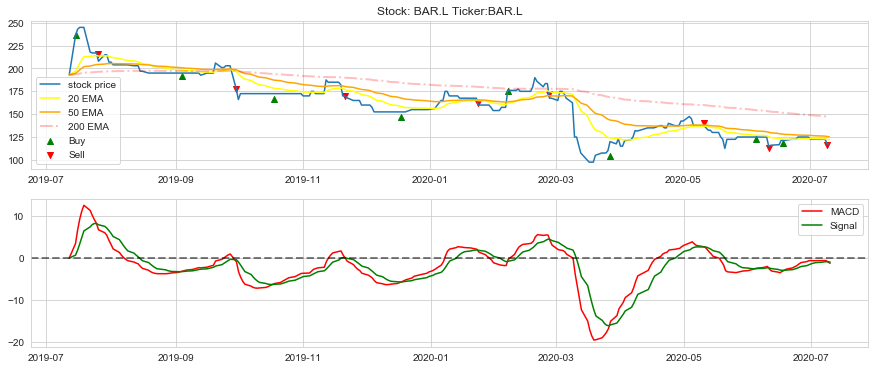

In [183]:
df = process_df("BAR.L", STARTDATE, config.MACD_long())
MACD_plot(df, "BAR.L")


EZJ.L
RMG.L
JNJ
ASML
NEM
BABA
TTD
IAG.L
GDR.L
DIS
IGP.L
JD.L
BYND
LLOY.L
FSLY
IGE.L
IQE.L
BARC.L
KOD.L
RDSB.L
MRO.L


/Users/icedevil2001/miniconda3/envs/stock/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


AFC.L


/Users/icedevil2001/miniconda3/envs/stock/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


VOD.L


/Users/icedevil2001/miniconda3/envs/stock/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


IPO.L


/Users/icedevil2001/miniconda3/envs/stock/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


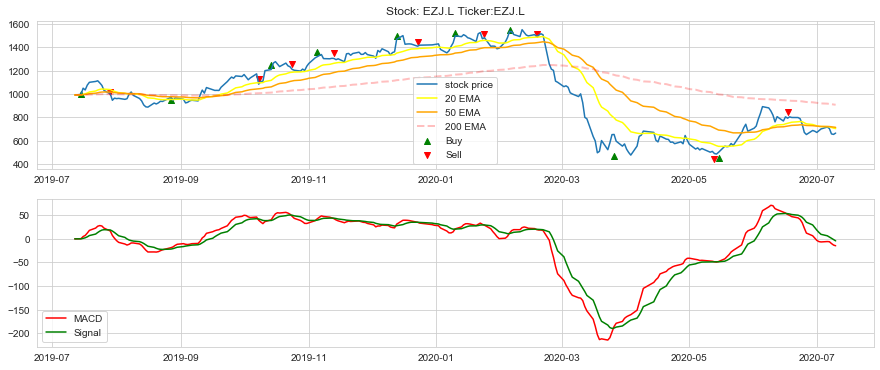

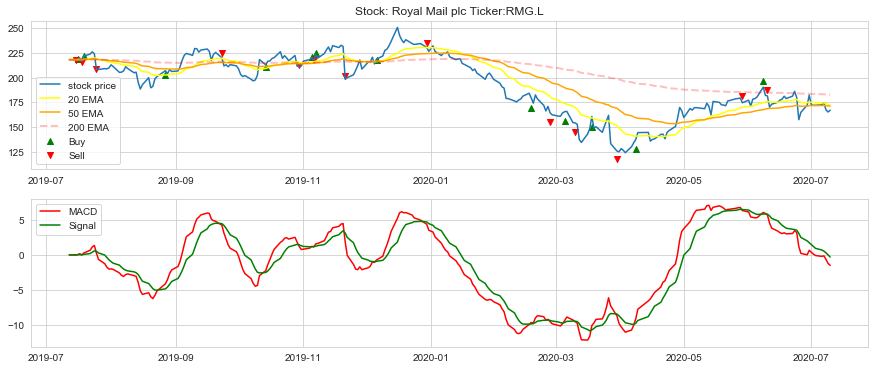

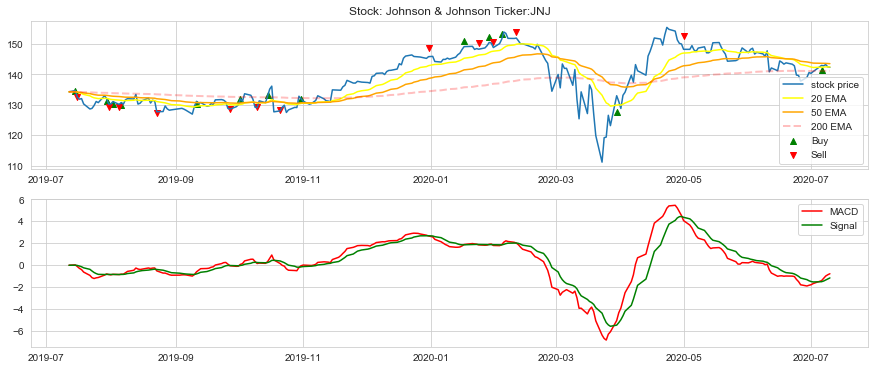

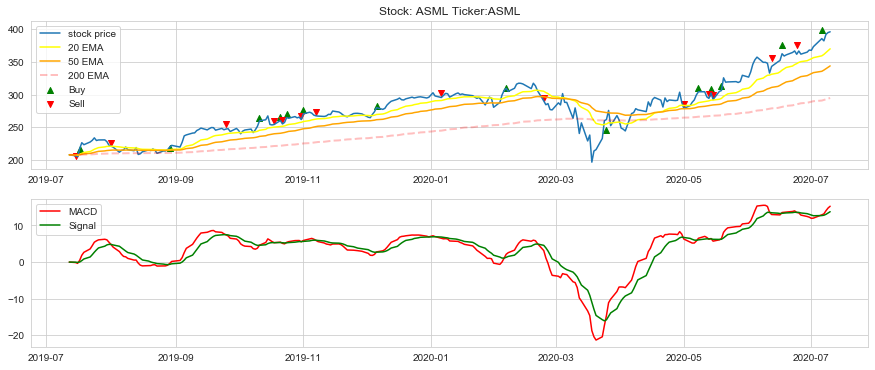

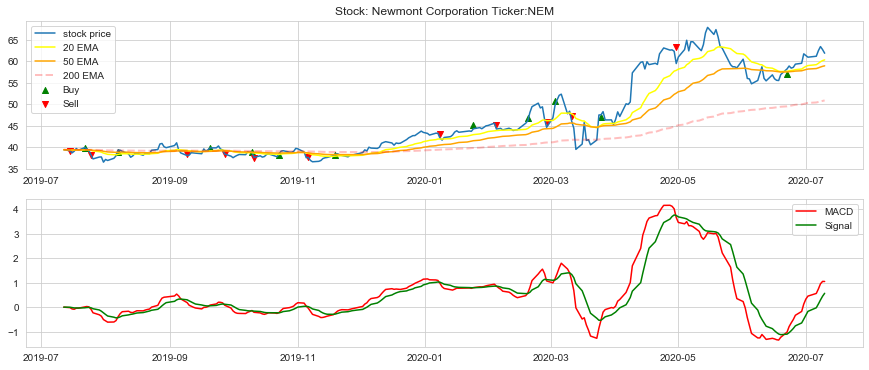

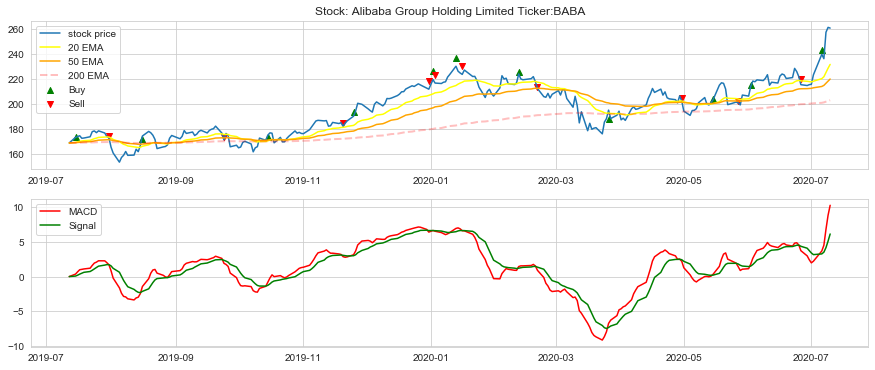

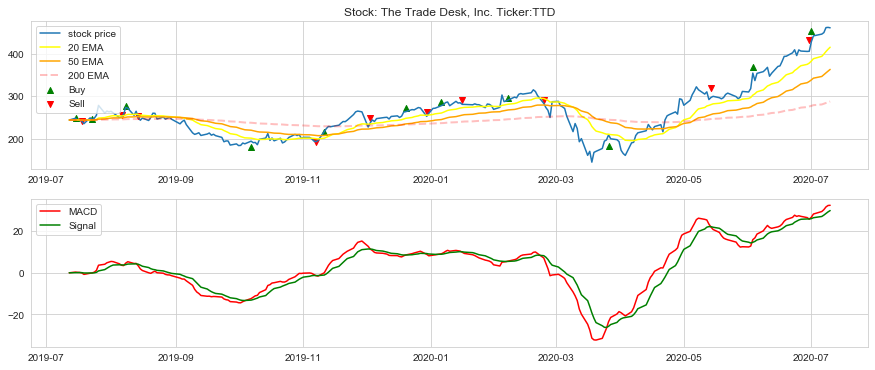

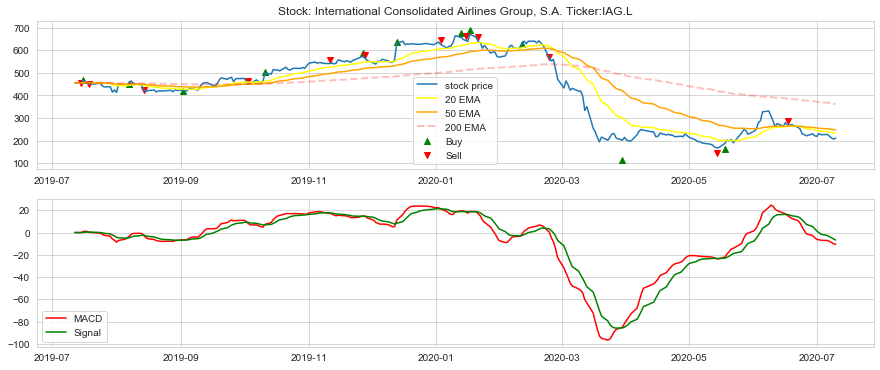

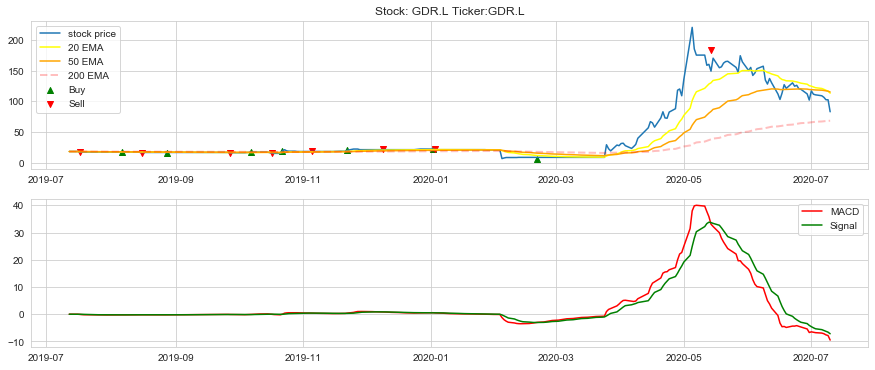

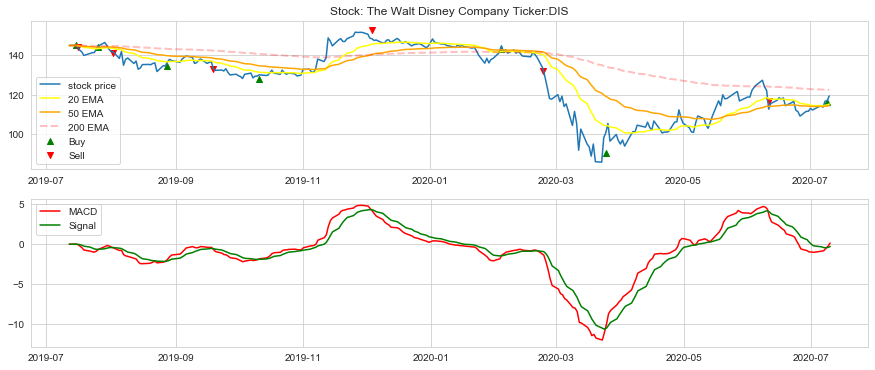

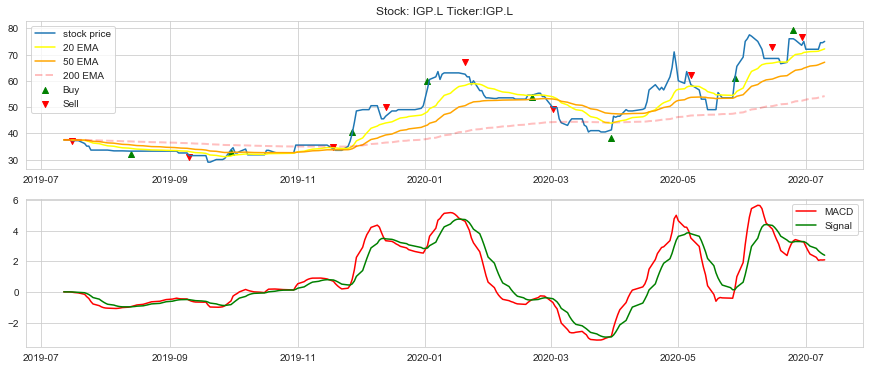

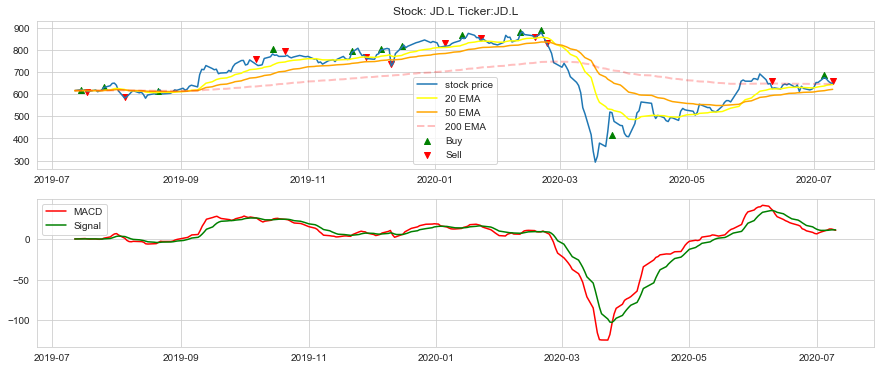

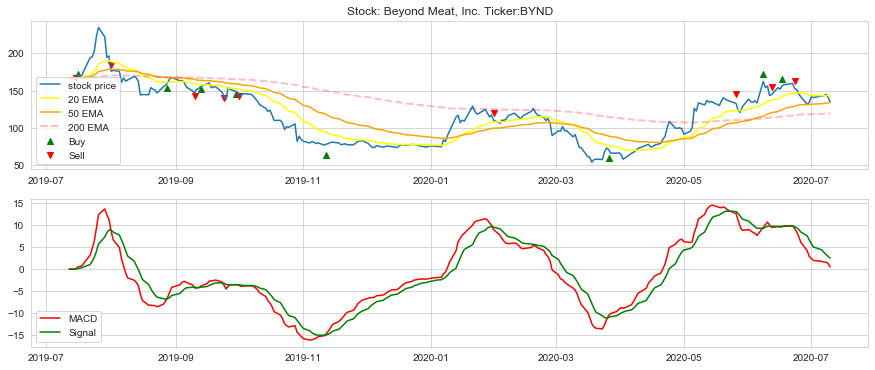

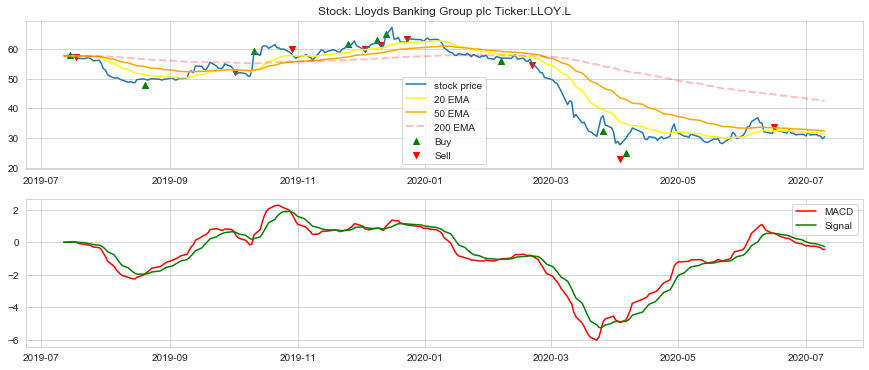

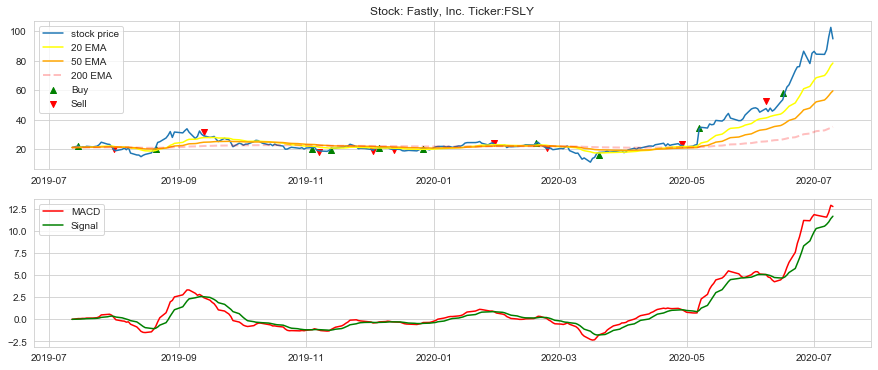

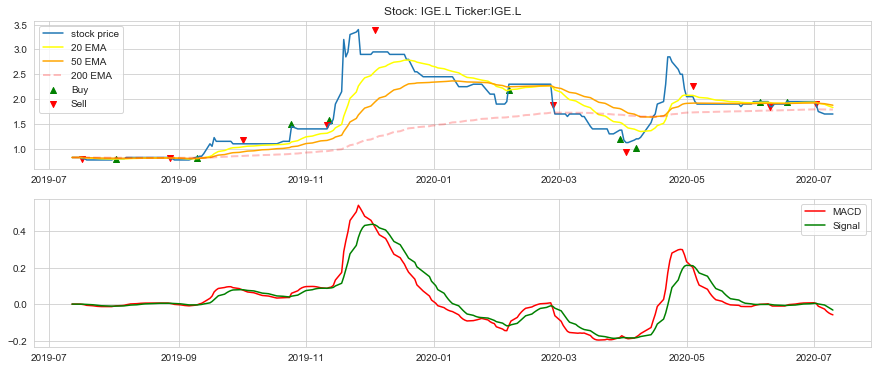

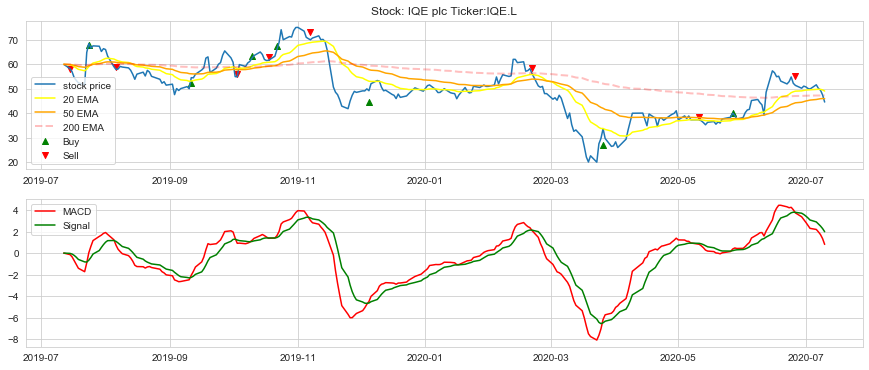

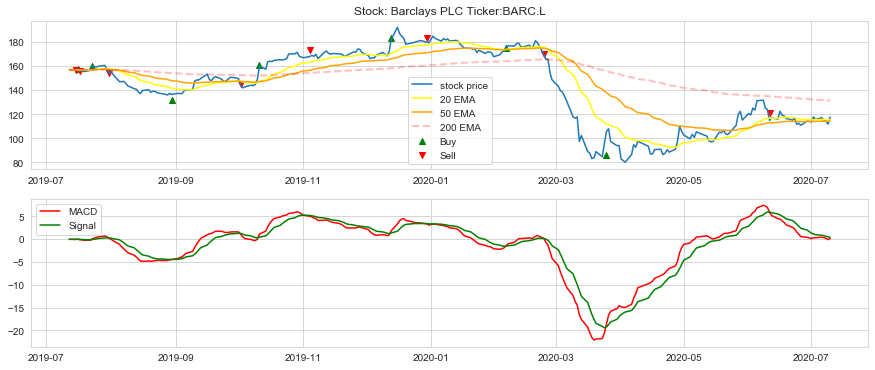

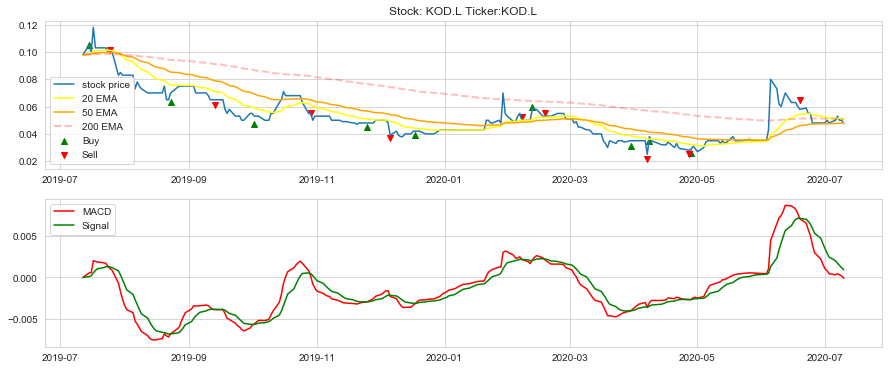

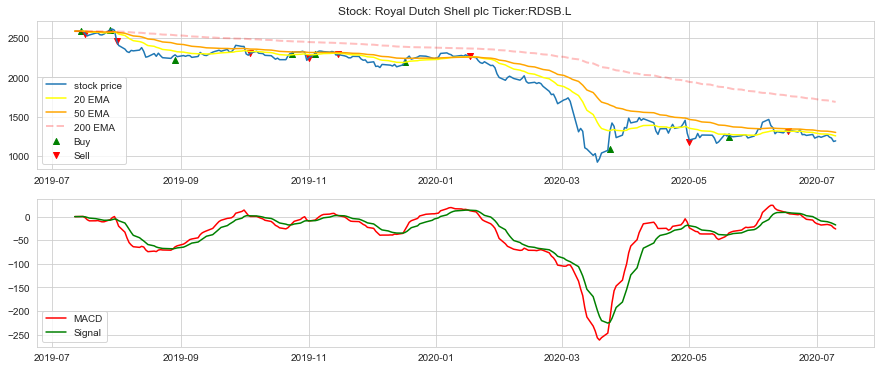

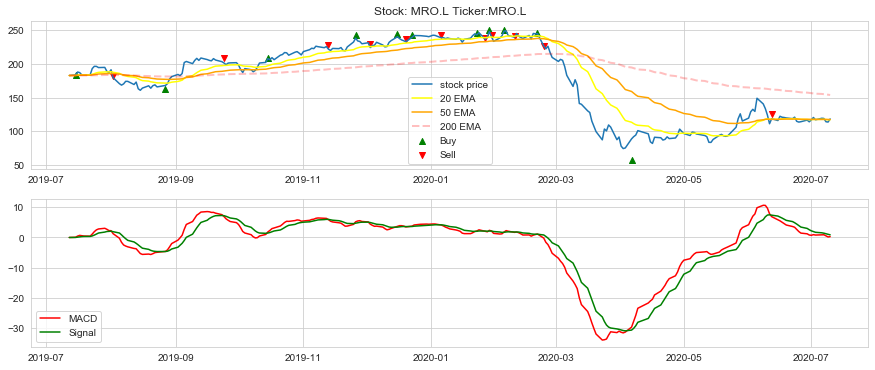

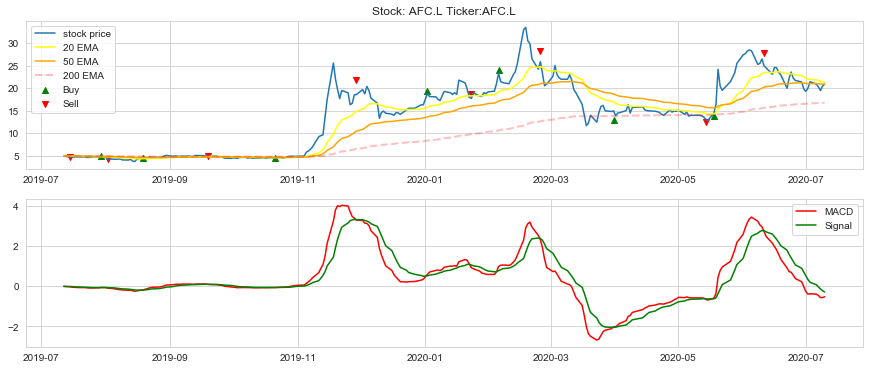

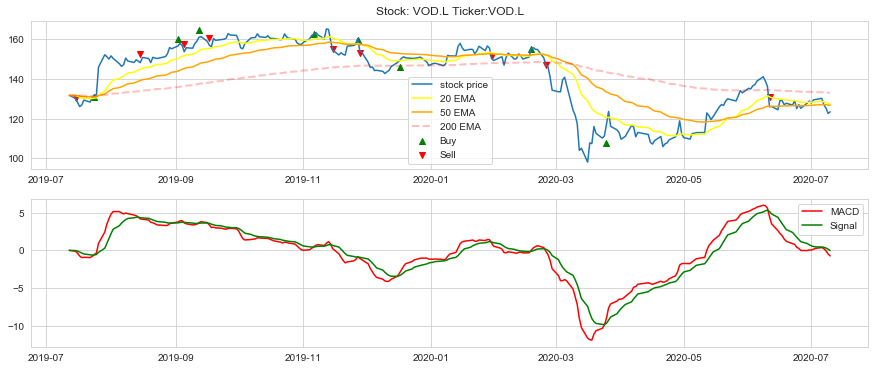

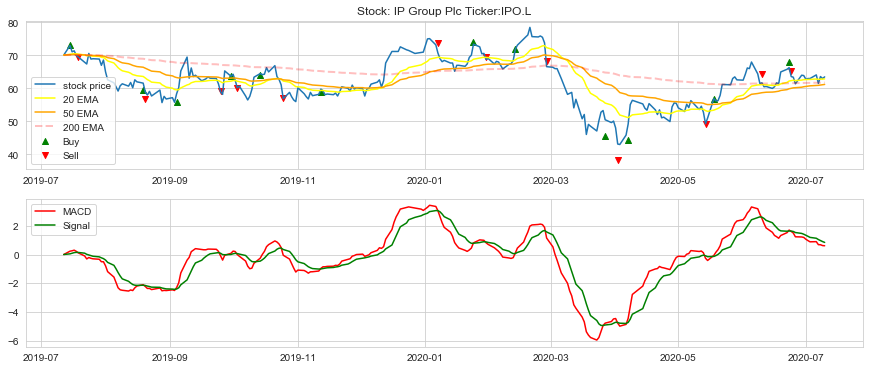

In [162]:

    
for i in set(current_stock.split()):
    stock = (convert_tinker(i))
    print(stock)
    try:
        df = process_df(stock, STARTDATE, config.MACD_long() )
#         print(len(df))
        MACD_plot(df, stock)
    except:
        print('Skipping')
        
        
#     i = (convert_tinker(i))
#     stock = yf.Ticker(i)
#     try:
#         print(i, stock.info['longName'])
#     except:
#         print(i)

In [150]:
# process_df("vlod.", STARTDATE)


In [152]:
STOCK = "BARC.L"
df = process_df(STOCK, STARTDATE, config.MACD_long() )
MACD_plot(df,STOCK )

AttributeError: 'Series' object has no attribute 'close'

In [153]:
# stock.dividends.loc['2020-06-03']

In [154]:
# s = yf.Ticker('lloy.L')
# print(s.info['longName'])
# s.get_dividends()



In [155]:
MACD_plot()

TypeError: MACD_plot() missing 2 required positional arguments: 'df' and 'tinker'

In [157]:
# %conda install -c quantopian ta-lib
